<a href="https://colab.research.google.com/github/Yingyony0097/ClassWork-Websit/blob/master/Getting_Started_with_Gemini_API_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Started with Gemini API Notebook

<a target="_blank" href="https://colab.research.google.com/drive/1Y90lCuvQkcf-TlHFcvZtKurHm5LLAEdP?usp=drive_link"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/></a>

ໂນດບຸດນີ້ແມ່ນເນື້ອຫາປະກອບເຂົ້າໃນການນຳສະເໜີພາຍໃຕ້ຫົວຂໍ້ 'Getting started with Gemini API' ໃນງານສຳມະນາ Build with AI 2025 Vientiane, ໂດຍຜູ້ບັນຍາຍຈະນຳໃຊ້ໂນດບຸກນີ້ເພື່ອສາທິດການໃຊ້ງານໂມເດວ Gemini ຜ່ານ Gemini Developer API.

ພາຍໃນໂນດບຸກນີ້ຈະມີການເວົ້າເຖິງ:

- ການສ້າງພຣອມໃນຮູບແບບຕ່າງໆ
- ການກຳນົດຄ່າໂມເດວໃນການສ້າງເນື້ອຫາ
- ການກຳນົດຄ່າຄວາມປອດໄພຂອງເນື້ອຫາທີ່ສ້າງໂດຍໂມເດວ
- ການສ້າງແລະບັນທຶກການສົນທະນາ ເພື່ອນຳໃຊ້ໃນພາຍຫຼັງ
- ການນຳໃຊ້ Function calling ເພື່ອກຳນົດການເຮັດວຽກໃນແອັບພຼິເຄຊັນຂອງເຮົາ
- ໃຫ້ໂມເດວສ້າງ ແລະ ຣັນຊຸດຄຳສັ່ງ ພ້ອມທັງສະແດງຜົນການຣັນຊຸດຄຳສັ່ງນັ້ນ (Code execution)
- ການອັບໂຫຼດຟາຍເພື່ອໃຫ້ໂມເດວວິເຄາະດ້ວຍ File API
- ການແຄຊເນື້ອຫາ (ໂທເຄນ) ຂອງພຣອມ (Context caching) ເພື່ອຫຼຸດຜ່ອນການປະມວນຜົນພຣອມຊ້ຳ
- ການສ້າງ Text Embeddings ເພື່ອນຳໄປໃຊ້ກັບວຽກງານຕ່າງໆ

# ເຊັດອັບໂປຣເຈັກ (Setup)

## ເອີ້ນໃຊ້ API Key

ໃນການທົດລອງໃຊ້ງານໂມເດວ Gemini ຜ່ານ API ນັ້ນ, ເຮົາຕ້ອງໃຊ້ນຳໃຊ້ API Key ໃນການຢືນຢັນຕົວຕົນ.​ ເຮົາສາມາດນຳເອົາ API Key ທີ່ເຮົາສ້າງມາເກັບໄວ້ໃນ Colab ໄດ້ທີ່ແທັບ Secrets (ຮູບກະແຈເບື້ອງຊ້າຍ) ແລ້ວເລືອກ Gemini API keys > import key from Google AI Studio.

## ຕິດຕັ້ງໄລບຣາລີ

ເຮົາຈະທຳການດາວໂຫຼດ ແລະ ຕິດຕັ້ງໄລບຣາລີຈາກ [PiPy](https://github.com/googleapis/python-genai) ດ້ວຍຄຳສັ່ງຕໍ່ໄປນີ້:

In [1]:
%pip install -U -q 'google-genai>=1.16.0'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.0/203.0 kB 6.2 MB/s eta 0:00:00


## Import dependencies

ເພື່ອຄວາມສະດວກໃນການທົດລອງ, ຜູ້ບັນຍາຍຈະ import ບັນດາ package ທີ່ຕ້ອງການນຳໃຊ້ບາດດຽວ

In [2]:
import json
import requests
import pathlib
import time
from google import genai
from google.colab import userdata
from google.genai import types
from IPython.display import display, Image, Markdown
import PIL.Image
from pydantic import BaseModel, TypeAdapter

In [7]:
from google.colab import userdata

# Store your API Key in this variable, where 'GOOGLE_API_KEY' is the name of yours stored in Colab.
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

## ສ້າງ SDK Client ເພື່ອເອີ້ນໃຊ້ໂມເດວ

ເຮົາທຳການສ້າງ client ເພື່ອເອີ້ນໃຊ້ໂມເດວດ້ວຍ API Key ທີ່ເຮົາກຽມໄວ້ແລ້ວ

In [8]:
from google import genai
# Import types to be used across this tutorial.
from google.genai import types

# Initialise a client with your API Key.
client = genai.Client(api_key=GOOGLE_API_KEY)

## ກຳນົດໂມເດວທີ່ຕ້ອງການໃຊ້ງານ

ຜູ້ທົດລອງສາມາດເລືອກໃຊ້ໂມເດວທີ່ຕ້ອງການໃຊ້ງານໄດ້ຕາມຕົວເລືອກທີ່ມີໃຫ້. ໂດຍເບື້ອງຕົ້ນ,​ ເຮົາຈະນຳໃຊ້ໂມເດວ Flash 2.5 (`gemini-2.5-flash-preview-05-20`).

In [9]:
MODEL_ID = "gemini-2.5-flash-preview-05-20" # @param ["gemini-2.5-flash-preview-05-20", "gemini-2.5-pro-preview-05-06", "gemini-2.0-flash-lite"] {"allow-input":true, isTemplate: true}

# ການສົ່ງພຣອມເບື້ອງຕົ້ນ

ເຮົາຈະນຳໃຊ້ເມທອດ `generate_content()` ໃນການສົ່ງພຣອມ ແລະຮັບເອົາຜົນລັບທີ່ໄດ້, ໂດຍຜູ້ທົດລອງສາມາດສົ່ງເປັນຂໍ້ຄວາມ (text) ແລະ ຮັບເອົາຂໍ້ຄວາມທີ່ສົ່ງມາຈາກໂມເດວໄດ້ດ້ວຍພຣອບເພີຕີ `.text`.
ໝາຍເຫດ: ພຣອມເພີຕີ `.text` ຈະໃຊ້ງານໄດ້ກໍຕໍ່ເມື່ອໂມເດວສົ່ງຜົນລັບມາພຽງແຕ່ພາກສ່ວນດຽວ ເຊັ່ນ ມີແຕ່ຂໍ້ຄວາມ ເປັນຕົ້ນ.

In [12]:
from IPython.display import Markdown

# Sends a simple prompt
simple_response = client.models.generate_content(
    model=MODEL_ID,
    contents="Who was the first human in space?"
)

Markdown(simple_response.text)

ສະບາຍດີ

# ການສົ່ງພຣອມແບບຫຼາກຫຼາຍໂມດ (Multimodal prompts)

ເຮົາສາມາດສົ່ງຟາຍຕ່າງໆເຊັ່ນ ຮູບ, ສຽງ, ວີດີໂອ, ແລະ ເອກະສານໃນຮູບແບບ PDF ໄປພ້ອມກັບຂໍ້ຄວາມໄດ້.

ໃນຕົວຢ່າງນີ້, ເຮົາຈະທຳການດາວໂຫຼດຟາຍຮູບຈາກ URL ທີ່ເຮົາລະບຸໄວ້ ແລະບັນທຶກລົງເຄື່ອງເພື່ອເອີ້ນໃຊ້.

> ຄຳແນະນຳ: ຜູ້ທົດລອງສາມາດອັບໂຫຼດຟາຍຂຶ້ນ Google Drive ຂອງທ່ານ ແລະສ້າງລິ້ງສຳລັບດາວໂຫຼດຟາຍນັ້ນໂດຍກົງທີ່ເວັບ [Google Drive Direct Link Generator](https://sites.google.com/site/gdocs2direct/home) ເພື່ອນຳມາປະກອບໃນການທົດລອງໄດ້.


In [ ]:
import pathlib
import requests

# Define a preferred image file URL.
image_url = "https://drive.google.com/uc?export=download&id=1rY-doV58QZwPs-B3TFILZNORHbEp8eIJ" # @param {"type": "string"}

# Download an image from a specified URL.
image_bytes = requests.get(image_url).content

# Set a path for the downloaded image.
image_path = pathlib.Path("ocr.jpg")
# Save image as a file.
image_path.write_bytes(image_bytes)

1627829

ຫຼັງຈາກເຮົາດາວໂຫຼດ ແລະບັນທຶກຮູບໄວ້ແລ້ວ, ເຮົາຈະທຳການສົ່ງຮູບດັ່ງກ່າວ ພ້ອມທັງຂໍ້ຄວາມທີ່ກຳນົດໃຫ້ໂມເດວອະທິບາຍຮູບນັ້ນ.

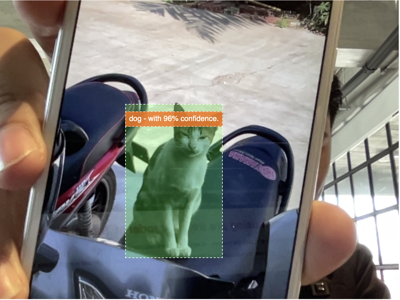

This picture captures a moment where an Artificial Intelligence (AI) or machine learning model, likely running on a smartphone application for object detection or augmented reality, has made a misclassification.

Here's what happened:

1.  **A person is holding a smartphone**, likely taking a photo or using a live camera feed.
2.  **On the phone's screen, there is an image of a cat** sitting on what appears to be a motorcycle.
3.  **An AI model has processed this image.** It has correctly identified the *presence* and *location* of an animal by drawing a green bounding box around it.
4.  **However, the AI has misclassified the animal.** Despite it being clearly a cat, the AI has labeled it as a "dog."
5.  **Furthermore, the AI states its classification with high confidence:** "dog - with 96% confidence."

In essence, the image humorously illustrates a common challenge in AI: even highly confident models can sometimes make significant errors in classification, identifying a cat as a dog in this instance.

In [ ]:
import PIL.Image
from IPython.display import display, Markdown

# Open an image from a file
image = PIL.Image.open(image_path)
image.thumbnail([400, 300.5])

image_description_response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        image,
        "Explain what happened in this picture"
    ]
)

display(image)
Markdown(image_description_response.text)

# ການສ້າງ ແລະຮັບຜົນລັບແບບສະຕຣີມ (Stream response)

ໂດຍທົ່ວໄປ, ໂມເດວຈະສົ່ງຜົນລັບມາຍັງຜູ້ຮັບກໍຕໍ່ເມື່ອການປະມວນຜົນນັ້ນໄດ້ສຳເລັດເປັນທີ່ຮຽບຮ້ອຍແລ້ວ. ຖ້າວ່າເຮົາຕ້ອງການໃຫ້ໂມເດວສົ່ງຜົນລັບມາໃນຂະນະທີ່ຍັງດຳເນີນການປະມວນຜົນຂໍ້ມູນຢູ່ນັ້ນ, ເຮົາສາມາດນຳໃຊ້ເມທອດ `generate_content_stream` ແລະ ອ່ານຂໍ້ມູນທີ່ໄດ້ຮັບຜ່ານຕົວປ່ຽນ `chuck` ດັ່ງຕົວຢ່າງລຸ່ມນີ້:

In [ ]:
response_stream = client.models.generate_content_stream(
    model=MODEL_ID,
    contents="Tell me the differences and similarities between industrial metal and nu metal"
)

for chuck in response_stream:
  print(chuck.text)
  print(".-.. --- .- -.. .. -. --.")

Industrial metal
.-.. --- .- -.. .. -. --.
 and nu metal are two distinct subgenres of heavy metal that emerged in the late 20th century, both incorporating electronic elements and pushing the boundaries of traditional metal. While they share some common ground, their core influences, methodologies, and overall
.-.. --- .- -.. .. -. --.
 aesthetic differ significantly.

Here's a breakdown of their similarities and differences:

---

### Similarities

1.  **Heavy, Downtuned Guitars:** Both genres extensively use downtuned, often seven-string, guitars to
.-.. --- .- -.. .. -. --.
 achieve a heavier, thicker, and more percussive sound than traditional metal. This contributes to a sense of weight and aggression.
2.  **Use of Electronics & Samples:** This is a major shared characteristic. Both incorporate synthesizers, samples
.-.. --- .- -.. .. -. --.
, loops, and sometimes drum machines or programmed elements into their sound. This provides a modern, often darker or more atmospheric textu

# ການກຳນົດຄ່າໃຫ້ໂມເດວ

ຜູ້ທົດລອງສາມາດກຳນົດຄ່າພາຣາມີເຕີຕ່າງໆເພື່ອຄວບຄຸມຜົນລັບທີ່ສ້າງໂດຍໂມເດວໄດ້ໂດຍການສົ່ງຄ່າ `GenerateContentConfig` ຜ່ານພາຣາມີເຕີ `config` ໄດ້ ດັ່ງຕົວຢ່າງລຸ່ມນີ້:



In [ ]:
from IPython.display import Markdown

configured_response = client.models.generate_content(
    model=MODEL_ID,
    contents="Explain how to play chess, but pretend I'm 5 years old kid.",
    # Define your content generation config here.
    config=types.GenerateContentConfig(
        temperature=0.4, # Controls randomness of the output.
        top_p=0.8, # Pick only
        top_k=20, # Pick only top K possible next tokens.
        candidate_count=1, # The number of generated the output.
        seed=1, # Random by default. Make the output predictable.
        presence_penalty=0.0, # Discourage model from repeating the same ideas or words.
        frequency_penalty=0.0, # Reduce repetitive use of words.
    )
)

Markdown(configured_response.text)


Hey there, superstar! Wanna learn a super cool game called Chess? It's like a secret mission with tiny armies!

Okay, imagine this:

1.  **The Big Playground:** Look at the board! It's like a big playground with black and white squares, right? Your pieces start on one side, and your friend's pieces start on the other.

2.  **Your Tiny Army:** You have a whole team of different friends! Each one moves in a special way.

    *   **The King (The Boss!):** This is the most important one! He's like the boss of your team. He can only take tiny steps, one square at a time, in any direction (forward, backward, sideways, slanted). Your job is to keep *your* King safe and try to *catch* the other team's King!

    *   **The Queen (The Super Speedy One!):** Wow, the Queen is super speedy! She can go *anywhere* she wants – straight lines (up, down, sideways) or slanted lines! She's like a superhero!

    *   **The Rooks (The Tall Castles!):** These are like tall castles or towers! They only go in straight lines – up and down, or side to side. Vroom!

    *   **The Bishops (The Pointy Hats!):** These guys have pointy hats! They only go on slanted lines, like sliding down a slide! They always stay on the same color squares they start on.

    *   **The Knights (The Hopping Horses!):** My favorite! This is the horsey! He's super special because he's the *only* one who can jump over other pieces! He moves in an 'L' shape – two steps straight, then one step to the side. Like a little hop!

    *   **The Pawns (The Little Soldiers!):** These are your little soldiers! They're brave! They only walk *forward* one step at a time. But on their *very first move*, they can take two steps if they want! And when they *eat* another piece, they do it by taking one slanted step forward.

3.  **Taking Turns:** You and your friend take turns moving just *one* piece at a time. It's like a dance!

4.  **Eating Pieces (Yum!):** If your piece lands on a square where another piece is, *boop!* You get to take their piece off the board! You "eat" it!

5.  **The Big Goal! (Catch the King!):** The game ends when one King is stuck and can't move anywhere safe because one of your pieces is pointing right at him! That means you caught him! You win!

It sounds like a lot, but it's super fun once you start! Let's set up the board and try it! We can just play with a few pieces first, okay? You'll be a chess master in no time!

# ການກຳນົດຄວາມປອດໄພຂອງເນື້ອຫາ

ຜູ້ທົດລອງສາມາດກຳນົດຄວາມປອດໄພຂອງເນື້ອຫາທີ່ສ້າງໂດຍໂມເດວໄດ້ດ້ວຍການສົ່ງຄ່າ `SafetySetting` ພ້ອມທັງກຳນົດຄ່າ `category` ແລະ `threshold`.

In [ ]:
from IPython.display import Markdown

messages_prompt = """
Write a list of 2 messages that I might say to someone after pissing me off.
"""

safety_settings = [
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT",
        threshold="BLOCK_ONLY_HIGH"
    )
]

safety_response = client.models.generate_content(
    model=MODEL_ID,
    contents=messages_prompt,
    config=types.GenerateContentConfig(
        safety_settings=safety_settings
    )
)

Markdown(safety_response.text)

# ການສ້າງການສົນທະນາ

ຈາກການທົດລອງສ້າງພຣອມເບື້ອງຕົ້ນ, ເຮົາຈະເຫັນວ່າເມທອດ `generate_content()` ເຮັດວຽກພຽງແຕ່ຄັ້ງດຽວ ແລະຈະບໍ່ຈື່ບໍລິບົດຂອງເນື້ອຫານັ້ນໆ.

ເພື່ອສ້າງການສົນທະນາທີ່ສາມາດໂຕ້ຕອບກັນໂມເດວໄດ້ຫຼາຍກວ່າໜຶ່ງຄັ້ງ, ເຮົາຈະນຳໃຊ້ເມທອດ `create_chat()` ຈາກຄຼາສ `chats` ເພື່ອສ້າງການສົນທະນາ ດັ່ງຕົວຢ່າງລຸ່ມນີ້:

In [ ]:
from IPython.display import Markdown

mobile_dev_instruction = """
you are a senior mobile developer and a helpful coding assistant.
you are a able to generate high-quality code in any programming language, especially Dart and Flutter.
"""

dart_chat_config = types.GenerateContentConfig(
    system_instruction=mobile_dev_instruction
)

# Create a chat object
dart_chat = client.chats.create(
    model=MODEL_ID,
    config=dart_chat_config,
)

ຫຼັງຈາກນັ້ນ, ເຮົາສາມາດໃຊ້ເມທອດ `send_message()` ເພື່ອສົ່ງພຣອມ ແລະຮັບຜົນລັບ.

In [ ]:
flutter_app_prompt = """
Write a simple todo list app in Flutter that has a button.
"""

chat_response = dart_chat.send_message(flutter_app_prompt)

Markdown(chat_response.text)

In [ ]:
chat_response = dart_chat.send_message("Well, write a test of the generated app please.")

Markdown(chat_response.text)

# ບັນທຶກ ແລະ ເອີ້ນໃຊ້ປະຫວັດການສົນທະນາ

ເຮົາສາມາດດຶງເອົາປະຫວັດການສົນທະນາ ເພື່ອບັນທຶກໄວ້ໃຊ້ໃນພາຍຫຼັງໄດ້; ໂດຍປະຫວັດການສົນທະນາຈະຢູ່ໃນຮູບແບບອາເຣ (array) ຂອງອັອບເຈັກ `types.Content` (`list[types.Content]`), ເຊິ່ງຈະມີພຣອບເພີຕີ `.role` ແລະ `parts`

ຕົວຢ່າງລຸ່ມນີ້ຈະສາທິດການບັນທຶກປະຫວັດການສົນທະນາໄວ້ໃນຮູບແບບ JSON.

In [ ]:
from pydantic import TypeAdapter

# Create a type adapter to convert a chat history to JSON list.
history_adapter = TypeAdapter(list[types.Content])

# Get a chat history.
# A chat history is a list of `Content` objects
# where you can access `.role` and `.parts` properties.
chat_history = dart_chat.get_history()

# Convert a chat history to JSON.
json_history = history_adapter.dump_json(chat_history)

ເຮົາສາມາດນຳເອົາປະຫວັດການສົນທະນາທີ່ບັນທຶກໄວ້ມານຳໃຊ້ກັບການສົນທະນາໃໝ່ໄດ້ດັ່ງນີ້.

In [ ]:
from IPython.display import Markdown

# Convert JSON back to Pydantic schema.
dart_chat_history = history_adapter.validate_json(json_history)

new_dart_chat = client.chats.create(
    model=MODEL_ID,
    config=dart_chat_config,
    history=dart_chat_history,
)

response = new_dart_chat.send_message("What was that app I told you to generate the code?")

Markdown(response.text)

# ການສ້າງ ແລະ ຮັບຜົນລັບໃນຮູບແບບ JSON

ໂດຍທົ່ວໄປແລ້ວ, ໂມເດວຈະສ້າງຜົນລັບອອກມາໃນຮູບແບບຂອງຂໍ້ຄວາມຍາວ.​ໃນກໍລະນີທີ່ຜູ້ທົດລອງຕ້ອງການຜົນລັບໃນຮູບແບບຂອງຂໍ້ມູນໂຄງສ້າງເຊັ່ນ JSON ກໍສາມາດເຮັດໄດ້ ດັ່ງຕົວຢ່າງລຸ່ມນີ້:

In [ ]:
from pydantic import BaseModel
import json

# Create a schema you want to receive.
class Cocktail(BaseModel):
  name: str
  description: str
  ingredients: list[str]
  instructions: list[str]

cocktail_response = client.models.generate_content(
    model=MODEL_ID,
    contents="Provide a recipe of the most famous cocktail from New Orleans",
    config=types.GenerateContentConfig(
        # Return output as JSON.
        response_mime_type="application/json",
        # Define your output schema here.
        response_schema=Cocktail,
    )
)

print(json.dumps(json.loads(cocktail_response.text), indent=4))


# ການສ້າງຮູບພາບ

 Gemini API ຮອງຮັບການສ້າງຮູບພາບຢູ່ 2 ແບບຄື:

## ການສ້າງຮູບພາບດ້ວຍໂມເດວ Gemini

ດ້ວຍວິທີນີ້, ຮູບພາບຈະສົ່ງມາພ້ອມກັບຂໍ້ຄວາມຫຼືຂໍ້ມູນອື່ນໆທີ່ໂມເດວສ້າງ. ເຮົາສາມາດດຶງເອົາຮູບພາບທີ່ໂມເດວສົ່ງມາດ້ວຍພຣອບເພີຕີ `.candidates[0].content.parts` ດັ່ງຕົວຢ່າງລຸ່ມນີ້:

In [ ]:
from IPython.display import Image, Markdown

# Generate an image with Gemini 2.0 Flash model
gen_image_response = client.models.generate_content(
  model="gemini-2.0-flash-exp", # this model supports image generation.
  contents="Oi, can ya create a black-and-white, manga-style image of a man sitting on a white plastic chair with his back to us, surrounded by a cloudy storm that is approaching?",
  config=types.GenerateContentConfig(
      # Define response modalities. like this. Otherwise, it won't work.
      response_modalities=['Text', 'Image']
  )
)

for part in gen_image_response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  elif part.inline_data is not None:
    mime = part.inline_data.mime_type
    print(mime)
    data = part.inline_data.data
    display(Image(data=data, width=512))



## ການສ້າງຮູບພາບດ້ວຍໂມເດວ Imagen

ເຮົາຈະນຳໃຊ້ເມທອດ `generate_images` ໃນການສ້າງຮູບພາບດ້ວຍໂມເດວ Imagen, ໂດຍເຮົາສາມາດກຳນົດລັກສະນະຂອງຜົນລັບໄດ້ດ້ວຍ `GenerateImagesConfig`.

ໝາຍເຫດ: ໂມເດວນີ້ມີຄ່າໃຊ້ຈ່າຍສຳລັບການໃຊ້ງານ (Paid tier).

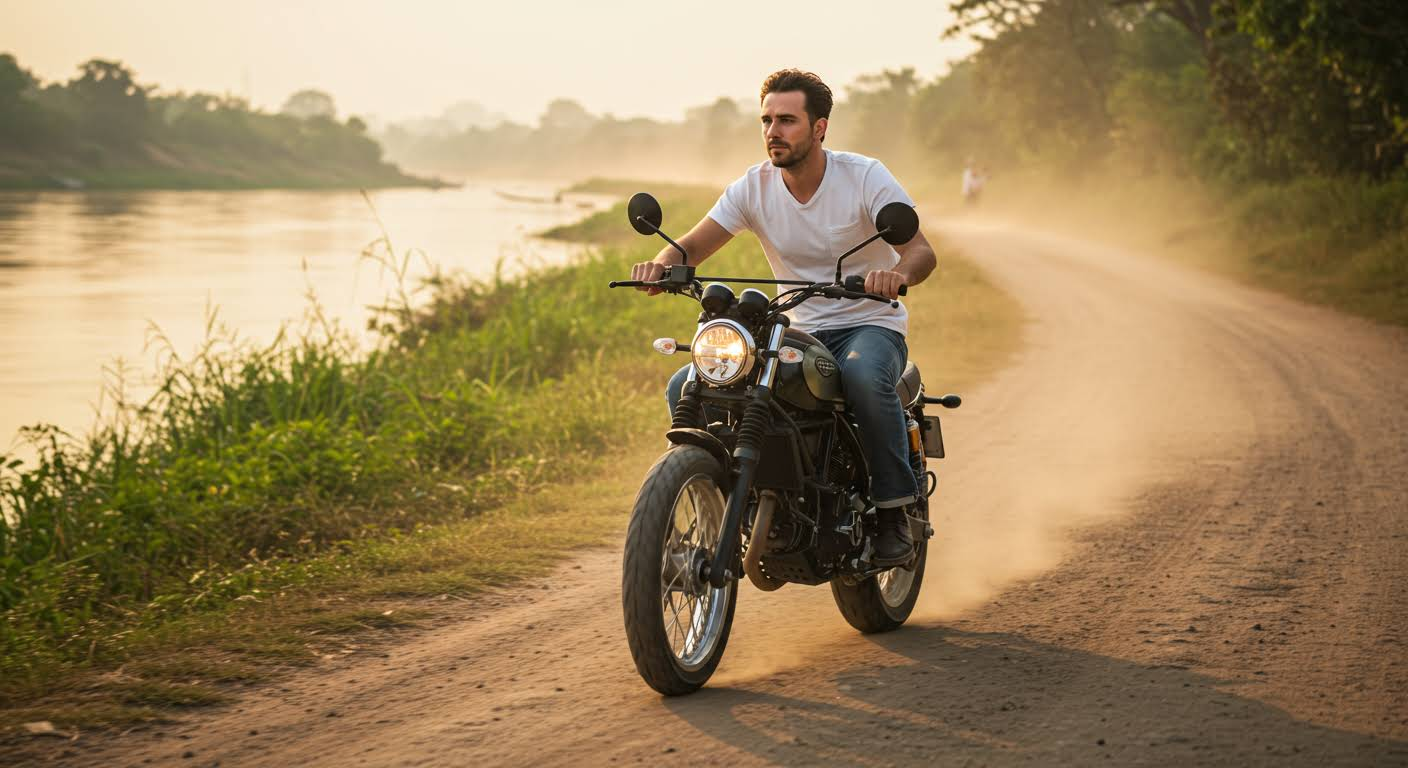

In [ ]:
imagen_response = client.models.generate_images(
    model="imagen-3.0-generate-002",
    prompt="A man wearing blue jeans and a white shirt, riding a scrambler down the road along the Mekong river",
    config=types.GenerateImagesConfig(
        # Supported ratio: "16:9", "9:16", "4:3", "3:4", "1:1".
        aspect_ratio="16:9",
        number_of_images=1,
        output_mime_type="image/jpeg",
        output_compression_quality=70,
        # Available value: "ALLOW_ADULT", "ALLOW_ALL", "DONT_ALLOW".
        person_generation="ALLOW_ADULT"
    )
)

for generated_image in imagen_response.generated_images:
  image_bytes = generated_image.image.image_bytes
  display(Image(data=image_bytes, width=512))

# ການນຳໃຊ້ Function calling

Function calling ເປັນເຄື່ອງມືທີ່ຊ່ວຍໃຫ້ໂມເດວເອີ້ນໃຊ້ຟັງຊັນການເຮັດວຽກຕ່າງໆຂອງແອັບພຼິເຄຊັນ ໂດຍອີງຕາມພຣອມທີ່ຮັບຈາກຜູ້ໃຊ້ໄດ້. ເຮົາຈະສາທິດການໃຊ້ງານດ້ວຍຕົວຢ່າງລຸ່ມນີ້:

In [ ]:
bistro_owner_instruction = """
You are an  bistro owner, mate!
You will receive any food orders from any customers out there.
"""

order_food = types.FunctionDeclaration(
    name="order_food",
    description="Serves the food or drink that the customer orders",
    parameters={
        "type": "OBJECT",
        "properties": {
            "food": {
                "type": "STRING",
                "description": "The food or drink that the customer orders",
            }
        },
        "required": ["food"],
    }
)

tip_me = types.FunctionDeclaration(
    name="tip_me",
    description="Receives an amount of tip money from a customer.",
    parameters={
        "type": "OBJECT",
        "properties": {
            "tip_amount": {
                "type": "NUMBER",
                "description": "An amount of tip given by a customer."
            }
        }
    }
)

tools = types.Tool(
    function_declarations=[order_food, tip_me],
)

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Have you seen an alien?",
    config=types.GenerateContentConfig(
        system_instruction=bistro_owner_instruction,
        tools=[tools],
        temperature=0,
    ),
)

# Model can response multiple functions if the conditions are met.
for part in response.candidates[0].content.parts:

  called_function = part.function_call

  print(f'called function: {called_function}')

  if called_function is not None:

    if called_function.name == 'order_food':

      print(f"Serve the {called_function.args['food']} please!")

      image_prompt = f'Generate an image of {called_function.args["food"]}'

      image_response = await client.aio.models.generate_content(
          model="gemini-2.0-flash-exp",
          contents=image_prompt,
          config=types.GenerateContentConfig(
            response_modalities=['Image', 'Text']
          )
      )

      for part in image_response.candidates[0].content.parts:
        if part.inline_data is not None:
          image_data = part.inline_data.data
          display(Image(data=image_data, width=512))
    elif called_function.name == 'tip_me':

        print(f"A customer has tipped {called_function.args['tip_amount']}")
  else:

    print(part.text)

# ການສ້າງ ແລະຣັນຄຳສັ່ງໂຄດ (Code execution)

ເຮົາສາມາດນຳໃຊ້ໂມເດວໃນການສ້າງ ແລະຣັນຊຸດຄຳສັ່ງພາສາ Python ເພື່ອເຮັດວຽກທີ່ສັບຊ້ອນ ແລະ ຕ້ອງການຄວາມຖືກຕ້ອງແມ່ນຢຳເຊັ່ນ ການຄິດໄລ່ຄຳນວນ ເປັນຕົ້ນ.

ຕົວຢ່າງລຸ່ມນີ້ແມ່ນ ເຮົາຈະໃຫ້ໂມເດວສ້າງແລະຣັນຊຸດຄຳສັ່ງທີ່ໃຫ້ບອກວ່າ ຈຳນວນທີ່ລະບຸໄວ້ເປັນຈຳນວນມູນ (Prime number) ຫຼືບໍ່.

In [ ]:
from IPython.display import Image, Markdown, Code, HTML

code_exe_response = client.models.generate_content(
    model=MODEL_ID,
    contents="Generate and run a script to check whether 13, 42, and 69 are prime numbers or not.",
    config=types.GenerateContentConfig(
        tools=[types.Tool(code_execution=types.ToolCodeExecution)]
    )
)

for part in code_exe_response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  if part.executable_code is not None:
    code_html = f'''
    <pre style="background-color: blue; color: white">{part.executable_code.code}</pre>
    '''
    display(HTML(code_html))
  if part.code_execution_result is not None:
    display(Markdown(part.code_execution_result.output))
  if part.inline_data is not None:
    display(Image(data=part.inline_data.data, format="png"))
  display(Markdown("---"))

# ການອັບໂຫຼດຟາຍດ້ວຍ File API

ໂດຍທົ່ວໄປແລ້ວ, ເຮົາສາມາດສົ່ງຟາຍໃຫ້ໂມເດວປະມວນຜົນໄດ້ໂດຍກົງ ດັ່ງທີ່ໄດ້ທົດລອງໄປກ່ອນໜ້ານີ້.​ ໃນກໍລະນີທີ່ຟາຍນັ້ນມີຂະໜາດໃຫຍ່ກວ່າ 20MB ແມ່ນຕ້ອງໄດ້ອັບໂຫຼດຟາຍຜ່ານ File API ໂດຍນຳໃຊ້ເມທອດ `upload_file`.

## ອັບໂຫຼດຮູບພາບ


In [ ]:
another_image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/Caspar_David_Friedrich_-_Wanderer_above_the_Sea_of_Fog.jpeg/500px-Caspar_David_Friedrich_-_Wanderer_above_the_Sea_of_Fog.jpeg" # @param {"type": "string"}

another_image_bytes = requests.get(
    another_image_url,
    # Some websites don't allow 'bots' to access their files.
    # So we add user agent to the request header.
    headers={
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }
).content

another_image_path = pathlib.Path('wanderer.jpeg')
another_image_path.write_bytes(another_image_bytes)

74318

In [ ]:
from PIL import Image
import time

# Upload the file using File API
image_file_upload = client.files.upload(file=another_image_path)

another_image = Image.open(another_image_path)

another_image_response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        image_file_upload,
        "Could you tell me the story of this painting?",
    ],
)

display(another_image)
Markdown(another_image_response.text)

## ອັບໂຫຼດຟາຍ PDF

In [ ]:
pdf_url = "https://drive.google.com/uc?export=download&id=1PnzVAh7EjcYb6zjWRy0X0m-rSt9PFvzZ" # @param {type: "string"}

pdf_bytes = requests.get(pdf_url).content

pdf_path = pathlib.Path('LaoPLM.pdf')
pdf_path.write_bytes(pdf_bytes)

535506

In [ ]:
pdf_upload = client.files.upload(file=pdf_path)

pdf_response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        pdf_upload,
        "Can you summarise this paper as a bulleted list?"
    ]
)

Markdown(pdf_response.text)

## ອັບໂຫຼດຟາຍວີດິໂອ

In [ ]:
video_url = "https://drive.google.com/uc?export=download&id=1-TEQQmLpr02VsYvsdFLz8sGdAyq1tl_D" # @param {"type": "string"}
video_file_name = "neurons-and-the-brain.mp4"
# Download a video file via wget
!wget -O "{video_file_name}" "{video_url}"

In [ ]:
video_file_upload = client.files.upload(file=video_file_name)
print(f"Uploading completed: {video_file_upload.uri}")

ເຮົາສາມາດກວດສອບສະຖານະການອັບໂຫຼດໄດ້ຜ່ານພຣອບເພີຕີ `.state`.

In [ ]:
while video_file_upload.state == "PROCESSING":
  print("Waiting for video to be processed")
  time.sleep(10)
  # Keep retrieving status while the process is still in progress.
  video_file_upload = client.files.get(name=video_file_upload.name)

# Throw an error if the process has failed.
if video_file_upload.state == "FAILED":
  raise ValueError(video_file_upload.state)

print(f"Video processing completed: {video_file_upload.uri}")

In [ ]:
video_upload_response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        video_file_upload,
        "Summarise information in this video."
    ]
)

Markdown(video_upload_response.text)

## ການຈັດການຟາຍທີ່ອັບໂຫຼດໄວ້

ເຮົາສາມາດຈັດການຟາຍທີ່ເຮົາອັບໂຫຼດໄວ້ແລ້ວໄດ້ດັ່ງຕົວຢ່າງລຸ່ມນີ້:

In [ ]:
# List all uploaded files.
uploaded_files_list = client.files.list();

for item in uploaded_files_list:
  print(item)

In [ ]:
# Get uploaded file info by name.
file_info = client.files.get(name="files/9dbasjcholc9")

print(file_info.name)

files/9dbasjcholc9


In [ ]:
# Delete uploaded file.

delete_file_response = client.files.delete(name="files/9dbasjcholc9")

print(delete_file_response)

# ການນຳໃຊ້ URL context

URL context ເປັນເຄື່ອງມືທີ່ຊ່ວຍໃຫ້ໂມເດວສາມາດນຳເອົາເນື້ອຫາຈາກ URL ທີ່ຕ້ອງການມາປະກອບໃນການວິເຄາະຫາຜົນລັບທີ່ເຮົາຕ້ອງການ.

In [ ]:
from IPython.display import Markdown

url_context_prompt = """
Compare Sazerac recipes from https://www.liquor.com/recipes/sazerac/
and https://www.diffordsguide.com/cocktails/recipe/3390/sazerac-new-orleans-style;
list the key differences between them.
"""

url_context_tool = [
    types.Tool(url_context=types.UrlContext)
]

url_context_config = types.GenerateContentConfig(
    tools=url_context_tool
)

url_context_response = client.models.generate_content(
    model=MODEL_ID,
    contents=[url_context_prompt],
    config=url_context_config,
)

Markdown(url_context_response.text)

# ການແຄຊເນື້ອຫາເພື່ອນຳກັບມາໃຊ້ໃໝ່ (Context caching)

ເຮົາສາມາດເກັບໂທເຄນຂອງຂ້ໍມູນທີ່ເຮົາປ້ອນເຂົ້າໄປໃນຮູບແບບຂອງແຄຊເພື່ອເອີ້ນໃຊ້ຊ້ຳໃນພາຍຫຼັງໄດ້, ທັງນີ້ ກໍເພື່ອເປັນການຫຼຸດຜ່ອນການປ້ອນຂໍ້ມູນເກົ່າຊໍ້າຊ້ອນ ແລະຫຼຸດຜ່ອນຄ່າໃຊ້ຈ່າຍຈາກການນຳໃຊ້ໂມເດວ.

In [ ]:
lecturer_instruction = """
You are an expert researcher and lecturer who has years of experience AI/ML.
Now look at the presentation slides below, and answer the following questions in a paragraph.
"""

slides_urls = [
    "https://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L1.pdf",
    "https://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L2.pdf",
    "https://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L3.pdf",
    "https://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L4.pdf",
    "https://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L5.pdf",
    "https://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L6.pdf",
]

In [ ]:
slide_paths = []

for index, url in enumerate(slides_urls):
  slide_bytes = requests.get(url).content

  slide_path = pathlib.Path(f'deep-learning-lesson-{index + 1}.pdf')
  slide_path.write_bytes(slide_bytes)
  slide_paths.append(slide_path)

# Should print "6".
print(len(slide_paths))

6


In [ ]:
uploaded_pdfs = []

for path in slide_paths:
  uploaded_pdfs.append(client.files.upload(file=path))

print(len(uploaded_pdfs))

6


In [ ]:
cached_content = client.caches.create(
    model=MODEL_ID,
    config=types.CreateCachedContentConfig(
        display_name="lecture slides",
        system_instruction=lecturer_instruction,
        contents=uploaded_pdfs,
        ttl="3600s",
    )
)

print(cached_content)

name='cachedContents/lw1clczx5xrt8ou4mpbxj06yxo2vmnyr759jorqk' display_name='lecture slides' model='models/gemini-2.5-flash-preview-05-20' create_time=datetime.datetime(2025, 5, 31, 8, 22, 23, 714638, tzinfo=TzInfo(UTC)) update_time=datetime.datetime(2025, 5, 31, 8, 22, 23, 714638, tzinfo=TzInfo(UTC)) expire_time=datetime.datetime(2025, 5, 31, 9, 22, 22, 641053, tzinfo=TzInfo(UTC)) usage_metadata=CachedContentUsageMetadata(audio_duration_seconds=None, image_count=None, text_count=None, total_token_count=125168, video_duration_seconds=None)


In [ ]:
for cache in client.caches.list():
  print(cache)

name='cachedContents/lw1clczx5xrt8ou4mpbxj06yxo2vmnyr759jorqk' display_name='lecture slides' model='models/gemini-2.5-flash-preview-05-20' create_time=datetime.datetime(2025, 5, 31, 8, 22, 23, 714638, tzinfo=TzInfo(UTC)) update_time=datetime.datetime(2025, 5, 31, 8, 22, 23, 714638, tzinfo=TzInfo(UTC)) expire_time=datetime.datetime(2025, 5, 31, 9, 22, 22, 641053, tzinfo=TzInfo(UTC)) usage_metadata=CachedContentUsageMetadata(audio_duration_seconds=None, image_count=None, text_count=None, total_token_count=125168, video_duration_seconds=None)


In [ ]:
context_response = client.models.generate_content(
    model=MODEL_ID,
    contents="How many topics are there being discussed in these slides?",
    config=types.GenerateContentConfig(
        cached_content=cached_content.name
    )
)

Markdown(context_response.text)

In [ ]:
result = client.caches.delete(name=cached_content.name)

# ການສ້າງ Text Embedding

ເຮົາສາມາດສ້າງ text embedding ດ້ວຍໂມເດວ Gemini Embedding (`gemini-embedding-exp-03-07`). ເຮົາສາມາດກຳນົດຮູບແບບຂອງ Embeddings ຕາມລັກສະນະການໃຊ້ງານໄດ້ໂດຍກຳນົດຄ່າ `task_type` ທີ່ຢູ່ໃນຄຼາສ `EmbedContentConfig`. ນອກຈາກນັ້ນ, ເຮົາຍັງສາມາດຈຳນວນມິຕິຂອງ Embeddings ໄດ້ຕາມຕ້ອງການ ເຊິ່ງໂດຍປົກກະຕິ,​ ໂມເດວຈະສ້າງ Embeddings ຂະໜາດ 3072 ມິຕິມາໃຫ້.

> ເກັດຄວາມຮູ້: Embeddings ແມ່ນເວັກເຕີ (ມາຕຮິດຖັນ-ແຖວ) ທີ່ແທນຄ່າໃຫ້ຂໍ້ມູນໃດໜຶ່ງ ເຊິ່ງອາດຈະເປັນຂໍ້ຄວາມ,​ຕົວເລກ,ຮູບພາບ,ເອກະສານ​ ໆລໆ.

In [ ]:
text_embeddings_response = client.models.embed_content(
    model="gemini-embedding-exp-03-07",
    contents=[
        "What is the meaning of life?",
        "What do we live for?",
    ],
    config=types.EmbedContentConfig(
        output_dimensionality=512,
        taskType="SEMANTIC_SIMILARITY" # @param ["SEMANTIC_SIMILARITY", "CLASSIFICATION", "CLUSTERING", "RETRIEVAL_DOCUMENT", "RETRIEVAL_QUERY", "QUESTION_ANSWERING", "FACT_VERIFICATION"]
      )
)

print(text_embeddings_response.embeddings)

[ContentEmbedding(values=[-0.029910328, -0.01064506, 0.01232048, -0.04363388, -0.013421752, 0.002329359, -0.0057898476, 0.01377629, 0.042485517, -0.0057607763, 0.016976383, -0.016454414, -0.024323622, 0.04008316, 0.13324209, 0.0067314673, -0.006783664, 0.011491284, 0.014296529, -0.006029128, 0.008233743, 0.00345852, 0.002163263, -0.012119229, -0.014921178, -0.0056867404, 0.01915917, 0.00018566486, 0.014377131, -0.006765622, -0.0035427376, 0.019510606, 0.005653181, 0.030145729, -0.009636214, -0.0028940549, 0.017069276, 0.006264033, -7.985408e-05, 0.021383405, -0.024914917, -0.00023122504, 0.0043579782, 0.0029407823, 0.032731887, -0.00259939, 0.0068594706, -0.027191132, -0.0029506884, 0.020990087, -0.015325378, 0.024030503, -0.0023436325, -0.16248043, -0.0033473268, 0.011838764, -0.006498432, -0.007640825, -0.0030167769, -0.0036708876, -0.021138562, -0.0042642243, -0.018381873, -0.04532587, 0.00734486, -0.009865271, 0.0018252932, -0.0019786523, -0.012262748, -0.0014146615, -0.015477954, 

# [Bonus] ນຳໃຊ້ພາສາລາວກັບໂມເດວ Gemini

ເພື່ອທົດສອບຄວາມສາມາດໃນການນຳໃຊ້ພາສາລາວຂອງ Gemini, ຜູ້ບັນຍາຍໄດ້ສ້າງການສົນທະນາທີ່ໃຫ້ໂມເດວຕອບຄຳຖາມຕ່າງໆເປັນພາສາລາວດັ່ງຕົວຢ່າງລຸ່ມນີ້:

In [ ]:
lao_lang_sys_prompt = """You are a Laotian polymath who has many experiences.
        You'll answer my question in Lao. If there's no Lao equivalent, please use English terms.
        """

lao_lang_chat = client.chats.create(
    model=MODEL_ID,
    config=types.GenerateContentConfig(
        system_instruction=lao_lang_sys_prompt,
    )
)

In [ ]:
lao_lang_response = lao_lang_chat.send_message("ສະບາຍດີ! ຊ່ວຍອະທິບາຍການເຮັດວຽກຂອງ LLM ໃຫ້ຂ້ອຍແນ່ໄດ້ບໍ່?")

Markdown(lao_lang_response.text)

In [ ]:
textbook_url = "https://drive.google.com/uc?export=download&id=11OIG8secV9EkF8_McGv3G2vf_oEJMPBh" #@param {type: "string"}

textbook_bytes = requests.get(textbook_url).content

textbook_path = pathlib.Path("m7-math-textbook.pdf")
textbook_path.write_bytes(textbook_bytes)

textbook_upload = client.files.upload(file=textbook_path)

lao_lang_response = lao_lang_chat.send_message([textbook_upload, "ເຈົ້າຊ່ວຍສະຫຼຸບບົດທີ 7 ແລະ 8 ໃນປຶ້ມແບບຮຽນນີ້ໃຫ້ຂ້ອຍແນ່ໄດ້ບໍ່?"])

Markdown(lao_lang_response.text)

In [ ]:
lao_lang_response = lao_lang_chat.send_message("ໂດຍ.​ ແລ້ວປຶ້ມແບບຮຽນທີ່ຂ້ອຍໃຫ້ເຈົ້າສະຫຼຸບໃຫ້ນັ້ນເປັນຂອງ ມ. ໃດ?")

Markdown(lao_lang_response.text)

# ຂໍ້ມູນເພີ່ມເຕີມ

ຜູ້ທົດລອງສາມາດສຶກສາຂໍ້ມູນເພີ່ມເຕີມກ່ຽວກັບການນຳໃຊ້ງານ Gemini API ໄດ້ທີ່ [https://ai.google.dev/gemini-api/docs](https://ai.google.dev/gemini-api/docs).